In [1]:
%matplotlib inline
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sys import path
import h5py
from sys import path
path.append("/home/hkli/work/mylib/")
import plot_tool

In [78]:
fmt='%2.f%%'
fig_x = 9
fig_y = fig_x*4/7
fonts = 20
xy_lb_size = 28
xy_tick_size = xy_lb_size - 5
legend_size =xy_tick_size -5
axis_linewidth = 2
plt_line_width = 2
cap_size = 5
tick_len = 6
matplotlib.style.use('default')
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rc( 'text', usetex=True)
# plt.rc( 'font', family='serif')

No handles with labels found to put in legend.


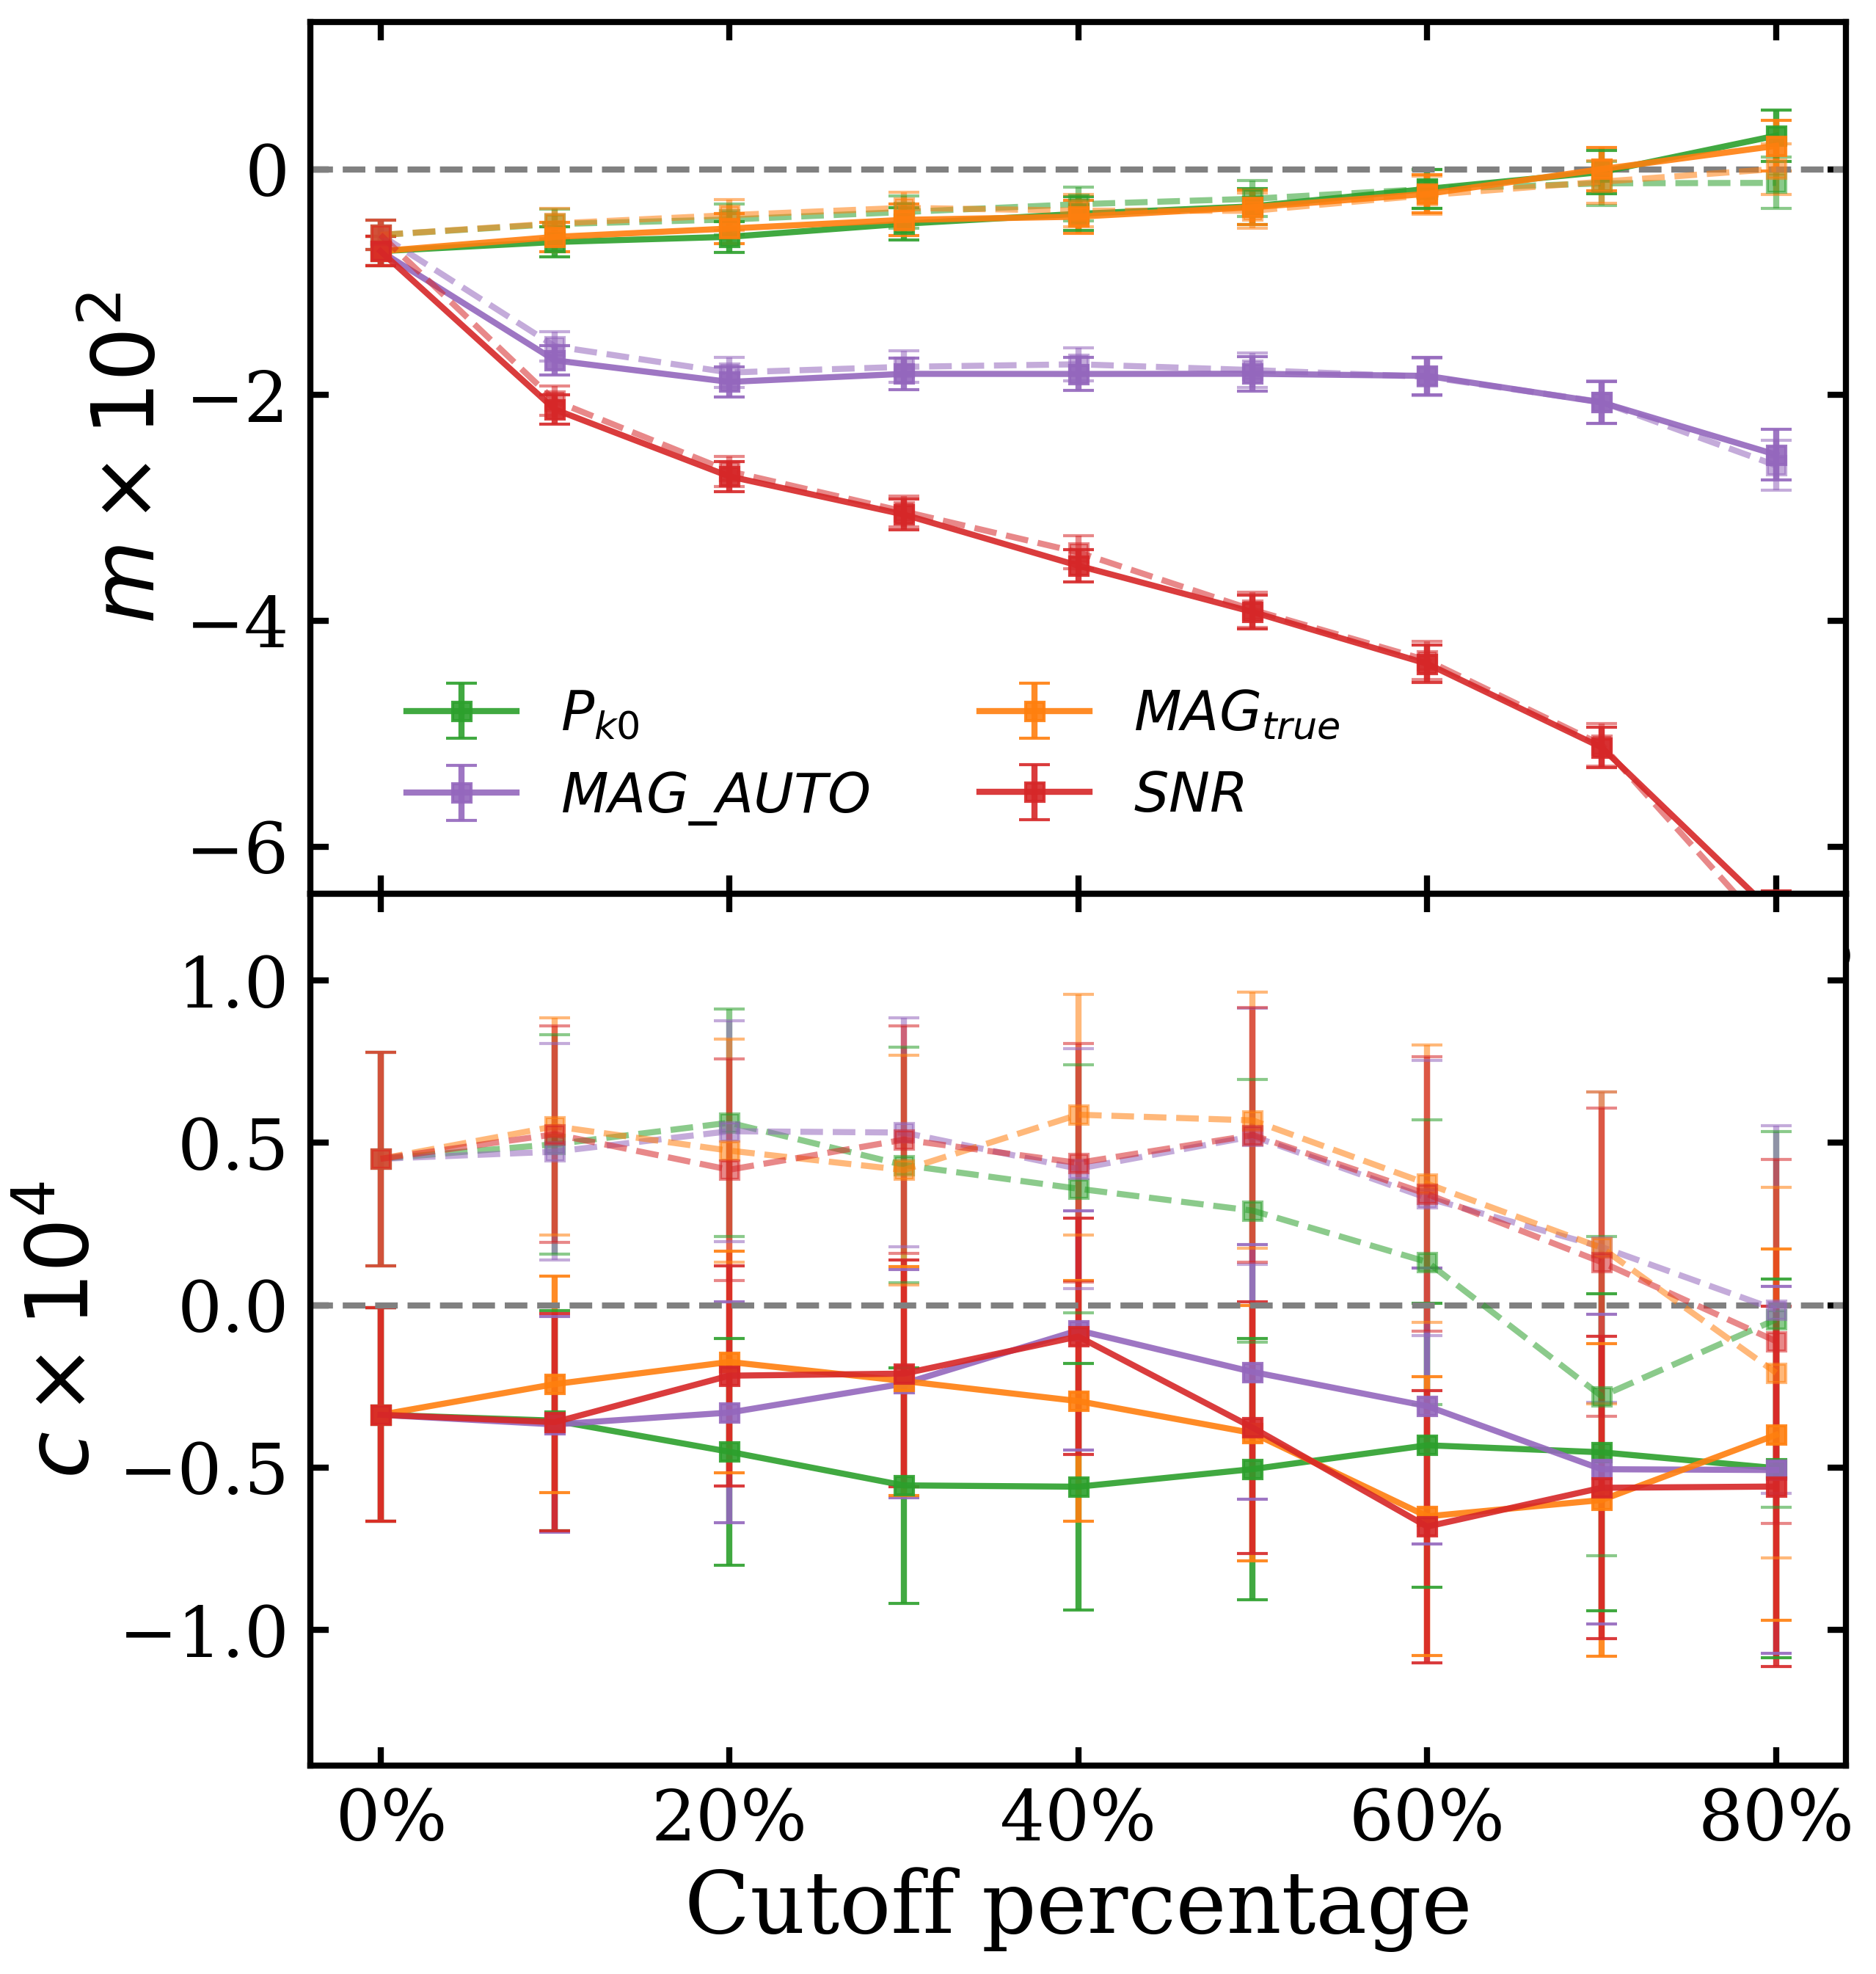

In [80]:
#  the m & c of point source
source_b = "simu_test1_paper"
source_f = "simu_test_paper"
# the bright source
data_path_1 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_b
# the faint source
data_path_2 = "/mnt/ddnfs/data_users/hkli/%s/result/cuts/sym/sex2_1.5/"%source_f
names = ["$P_{k0}$", "$MAG\_AUTO$", "$MAG_{true}$", "$SNR$", "$SNR_A$"]
files = ["flux2_ex1","mag_auto", "flux2_ex5","sex_snr"]
ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = [i for i in range(ch_num)]
ylabels = ["$ m \\times 10^2$", "$c \\times 10^4$", "$m_1 \\times 10^2$", "$m_2 \\times 10^2$"]


figs = (fig_x, fig_y*2)
xticks = mtick.FormatStrFormatter(fmt)
fig = plt.figure(figsize=figs, dpi=300)
# plt.rc( 'text', usetex=True)
# plt.rc( 'font', family='serif')

dys = [(1, 0.4), (-0.2, 0.2), (-0.4, 0.5), (-0.4, 0.5)]
legend_pos = [ (0.07, 0.75), (0.2, 0.62), ]
colors = ["C2","C4", "C1","C3"]
for j in range(2):
    
    row, col = divmod(j, 1)
    
    ax = fig.add_subplot(211+j)
    ax.tick_params(direction='in', labelsize=xy_tick_size, top=True, right=True, pad=7)
    for axis in ["bottom", "left", "top", "right"]:
        # the line width of the frame
        ax.spines[axis].set_linewidth(axis_linewidth)
    ax.xaxis.set_tick_params(which="both",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="major",direction="in",length=tick_len, width=axis_linewidth)
    ax.yaxis.set_tick_params(which="minor",direction="in",length=tick_len-2, width=axis_linewidth)
    
    for i in range(len(files)):

        if row == 0:
            h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
            mc = h5f['/mc1'].value[:, ch]
            ax.errorbar(x_coord, 100*mc[0], 100*mc[1], c=colors[i], linewidth=plt_line_width,
                capsize=cap_size, label=names[i], marker="s",alpha=0.9)
            h5f.close()
            h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
            mc = h5f['/mc2'].value[:, ch]
            ax.errorbar(x_coord, 100*mc[0], 100*mc[1], c=colors[i], linewidth=plt_line_width,
                capsize=cap_size, linestyle="--", marker="s",alpha=0.55)
            h5f.close()
            ax.set_xticklabels([])
        else:
            h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
            mc = h5f['/mc1'].value[:, ch]
            ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=colors[i], linewidth=plt_line_width,
                capsize=cap_size, marker="s",alpha=0.9)
            h5f.close()
            h5f = h5py.File(data_path_2+files[i]+"/total.hdf5")
            mc = h5f['/mc2'].value[:, ch]
            ax.errorbar(x_coord, 10000*mc[2], 10000*mc[3], c=colors[i], linewidth=plt_line_width,
                capsize=cap_size, linestyle="--",  marker="s",alpha=0.55)
            h5f.close()

    xs = ax.set_xlim()
    ys = ax.set_ylim()
    ax.plot([xs[0],100], [0,0], linewidth=plt_line_width, c="grey", linestyle="--")
    ax.set_xlim(xs[0], xs[1])
    ax.set_ylim(ys[0] + dys[j][0], ys[1]+ dys[j][1])
    ax.xaxis.set_major_formatter(xticks)    
    ax.set_xlabel("Cutoff percentage", fontsize=xy_lb_size)
    ax.set_ylabel(ylabels[j], fontsize=xy_lb_size)
    ax.legend(ncol=2, loc="lower left", fontsize=legend_size , bbox_to_anchor=(0.03, 0.02), frameon=False)
plt.subplots_adjust(hspace=0,  wspace=0.25)
plt.savefig("/home/hkli/work/jupyter_run/pic/pts_mc_poster.pdf",bbox_inches='tight')
plt.show()